In [ ]:
%pip install qiskit
%pip install matplotlib
%pip install qiskit-aer
%pip install pylatexenc


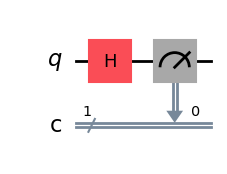

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

# Create your first quantum circuit
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
qc.h(0)  # Apply Hadamard gate
qc.measure(0, 0)  # Measure qubit 0 into classical bit 0

# Draw the circuit
qc.draw('mpl')  # Use 'mpl' for a better visualization


In [2]:
# Create a circuit to experiment with gates
qc = QuantumCircuit(1, 1)

# X gate (NOT gate)
qc.x(0)

# H gate (Hadamard)
qc.h(0)

# Measure
qc.measure(0, 0)

# Visualize
qc.draw()


┌───┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0

{'1': 499, '0': 525}


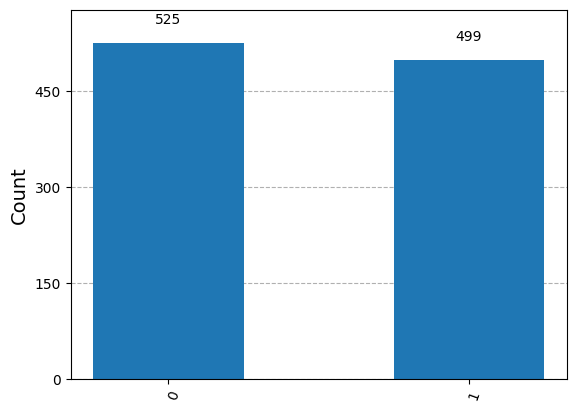

In [10]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate
qc.x(0)  # Apply X gate (NOT gate)
qc.measure(0, 0)  # Measure the qubit

# Select a quantum simulator backend
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator (optimizes for backend)
qc_transpiled = transpile(qc, simulator)

# Run the transpiled circuit
job = simulator.run(qc_transpiled, shots=1024)

# Get results
results = job.result()
counts = results.get_counts()

# Print results and show histogram
print(counts)
plot_histogram(counts)
